In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy 
import skimage.io

In [3]:
def load_image(path_input):
    img = cv2.imread(path_input)
    return img

# a

In [4]:
main_image = cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/bookshelf_1.jpg')
gray_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)
template = cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/book_1.jpg',0)
height, width = template.shape

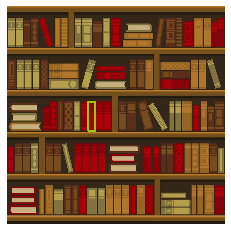

In [5]:

match = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(main_image,top_left, bottom_right, (0, 204, 153), 8)
cv2.imwrite('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/book_detect.jpg', main_image)
temp = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(temp)


# b

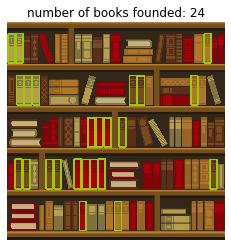

In [83]:
main_image = cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/bookshelf_1.jpg')
gray_image = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

template = cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/book_1.jpg', 0)
width, height = template.shape[::-1] 

match = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.85
position = np.where(match >= threshold) 
count = 0
for point in zip(*position[::-1]): 
    count += 1
    cv2.rectangle(main_image, point, (point[0] + width, point[1] + height), (0, 204, 153), 5)

temp = cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB)
plt.title('number of books founded: {}'.format(count//3))
plt.axis('off')
plt.imshow(temp)

# d

In [151]:
def downscale_img(orginal_image, percent):
 
    scale_percent = percent
    width = int(orginal_image.shape[1] * scale_percent / 100)
    height = int(orginal_image.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(orginal_image, dim,interpolation = cv2.INTER_AREA)
    
    return resized

In [152]:
main_image2 = cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/bookshelf_2.jpg')
template2 = cv2.imread('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/book_2.jpg',0)

In [153]:
image_50per = downscale_img(main_image2, 25)
template_50per = downscale_img(template2, 25)

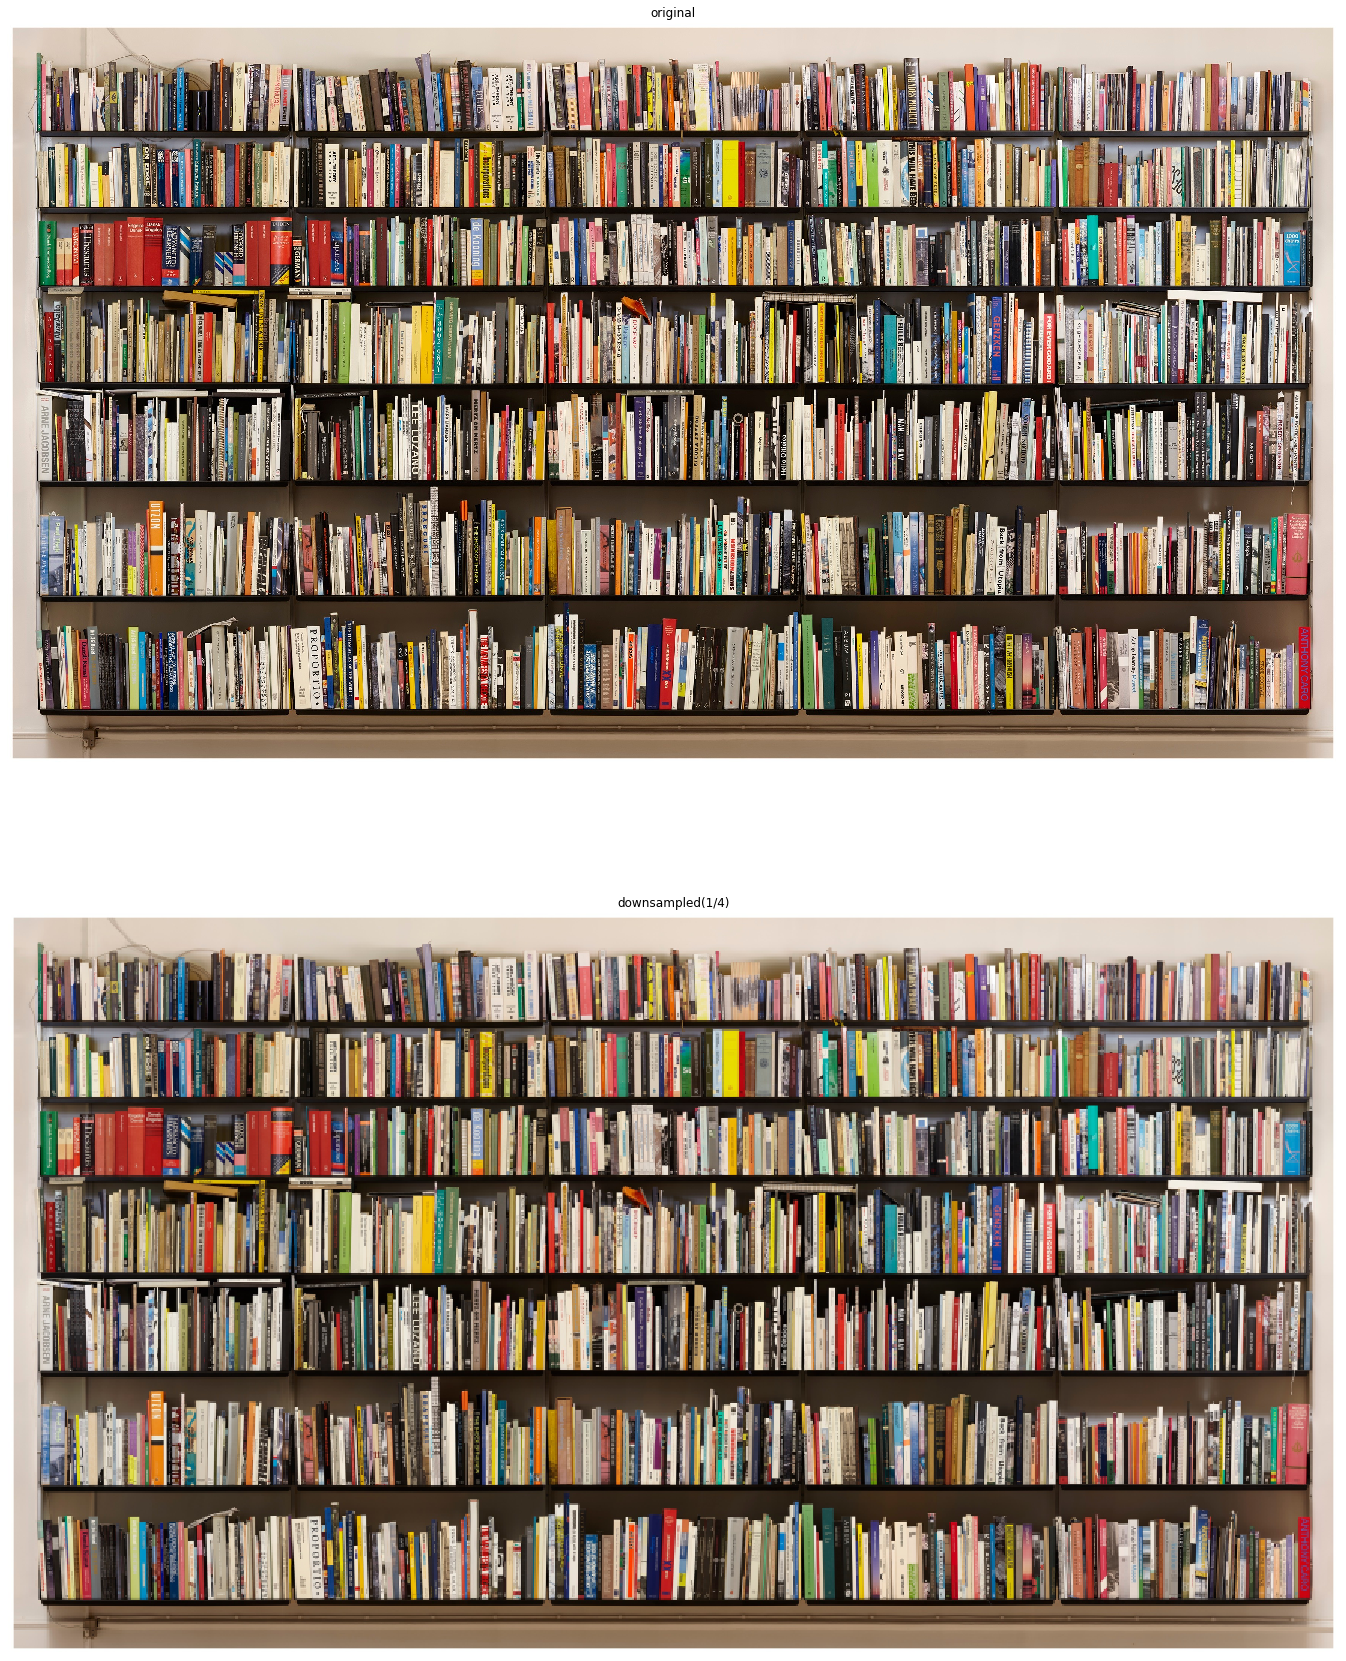

In [154]:
plt.figure(figsize = (30,30))
plt.subplot(2,1,1)
plt.imshow(cv2.cvtColor(main_image2, cv2.COLOR_BGR2RGB))
plt.title('original')
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(cv2.cvtColor(image_50per, cv2.COLOR_BGR2RGB))
plt.title('downsampled(1/4)')
plt.axis('off')
plt.show()

In [155]:
print("\t\t\torginal image size:", main_image2.shape[0], "*" , main_image2.shape[1],"\n")
print("\t\t\timage resize 50 percent:", image_50per.shape[0], "*" , image_50per.shape[1])

			orginal image size: 1972 * 3543 

			image resize 50 percent: 493 * 885


# e

In [156]:

image_25per = main_image2

template_25per = template2

In [157]:
gray_image2 = cv2.cvtColor(image_25per, cv2.COLOR_BGR2GRAY)
height, width= template_25per.shape


match = cv2.matchTemplate(gray_image, template_25per, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(image_25per,top_left, bottom_right, (89, 52, 225), 30)
cv2.imwrite('C:/Users/sherw/OneDrive/Desktop/DIP_HW1/inputs/P5/book_2_detect.jpg', image_25per)


True

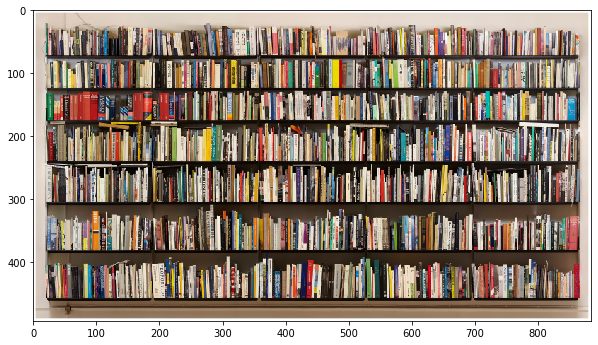

In [158]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_50per, cv2.COLOR_BGR2RGB))
plt.show()